<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/ei_u4_02_23150421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
# Kenya Michell Rodríguez Moreno
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),69.5,3.0,9.423729,0.001771
Residual,29.5,12.0,NaN,NaN


valor-p (Shapiro) = 0.2808008139238357


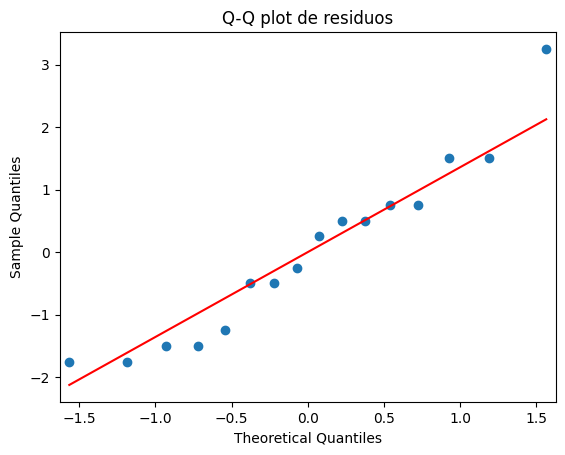

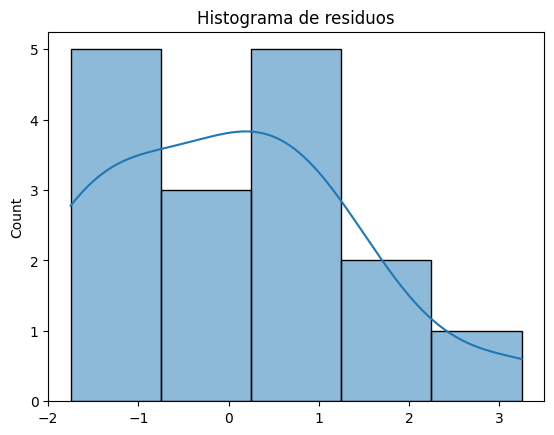

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.4485146502776487


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

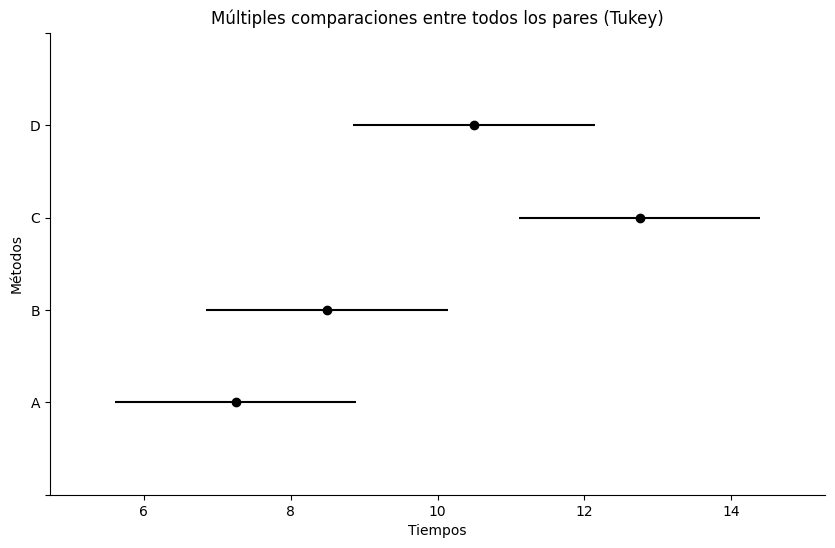

In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Métodos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Lambda óptimo: -0.2809888705290132


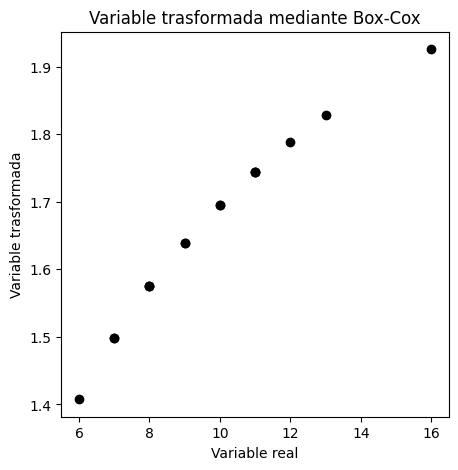

In [ ]:
# Kenya Michell Rodríguez Moreno
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),0.202435,3.0,10.789983,0.001006
Residual,0.075046,12.0,NaN,NaN


valor-p (Shapiro) = 0.5124442012773083


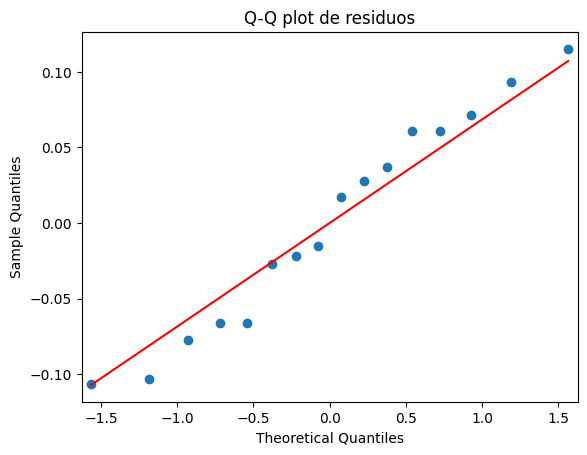

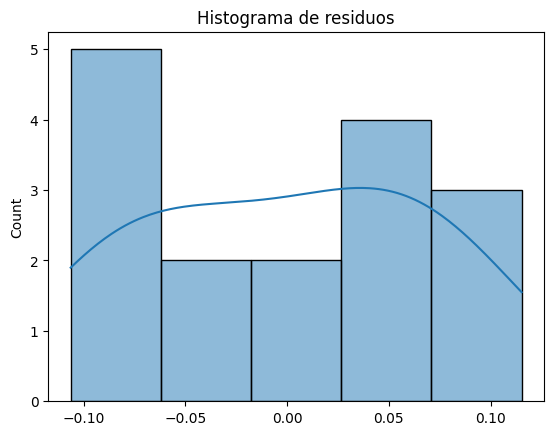

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['respuesta_boxcox']
grupo2 = df[df['metodo'] == 'B']['respuesta_boxcox']
grupo3 = df[df['metodo'] == 'C']['respuesta_boxcox']
grupo4 = df[df['metodo'] == 'D']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9372028709850322


Conclusión:
El ANOVA muestra diferencias significativas entre los métodos de ensamble. Después de confirmar los supuestos y aplicar la prueba de Tukey, se observa que los métodos no producen el mismo tiempo de ensamble y que algunos son más eficientes que otros. Se concluye que el método de ensamble sí influye significativamente en el tiempo requerido.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
# Kenya Michell Rodríguez Moreno
import pandas as pd
from io import StringIO
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Datos para el problema 2
datos_problema_2 = {
    'Tipo_de_cuero': ['A', 'A', 'A', 'A', 'A', 'A',
                      'B', 'B', 'B', 'B', 'B', 'B',
                      'C', 'C', 'C', 'C', 'C', 'C',
                      'D', 'D', 'D', 'D', 'D', 'D'],
    'Observaciones': [264, 260, 258, 241, 262, 255,
                      208, 220, 216, 200, 213, 206,
                      220, 263, 219, 225, 230, 228,
                      217, 226, 215, 227, 220, 222]
}
df_problema_2 = pd.DataFrame(datos_problema_2)

# Nivel de significancia = 0.05
# H0: Todos los tipos de cuero tienen el mismo desgaste
# H1: Al menos uno tiene un desgaste distinto

# El modelo ANOVA
modelo_lineal_p2 = ols('Observaciones ~ C(Tipo_de_cuero)', data=df_problema_2).fit()
tabla_anova_p2 = sm.stats.anova_lm(modelo_lineal_p2, typ=2)
tabla_anova_p2

,sum_sq,df,F,PR(>F)
C(Tipo_de_cuero),7019.458333,3.0,22.755356,0.000001
Residual,2056.500000,20.0,NaN,NaN


valor-p (Shapiro) = 0.00967014513830024


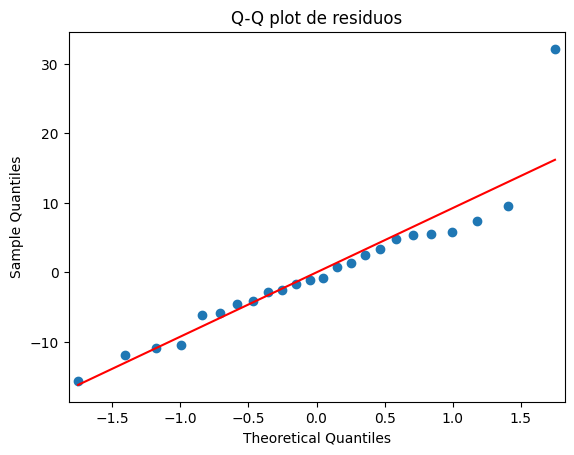

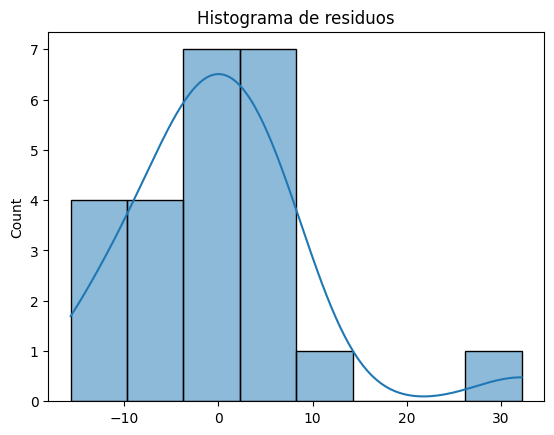

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

#solo esta linea de abajo se cambia, lo demas se copia igual

residuos = modelo_lineal_p2.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

#PODEMOS DECIR QUE FALLO EL TEST DE SHAPIRO POR QUE NO NOS DIÓ UNA LINEA RECTA EN LOS RESUDUALES. EL ANOVA NO EST TAN CONFIABLE

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'A']['Observaciones']
grupo2 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'B']['Observaciones']
grupo3 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'C']['Observaciones']
grupo4 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'D']['Observaciones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.6351342635286297


Lambda óptimo: -3.707788382033557


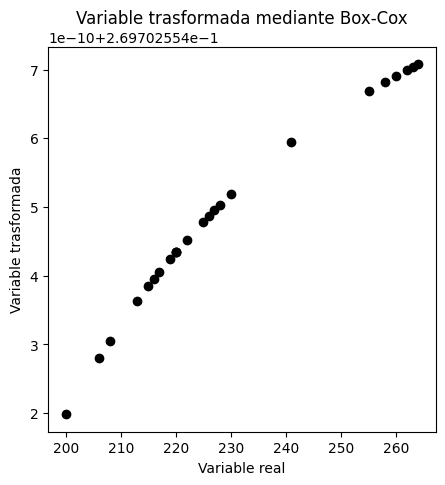

In [ ]:
# Kenya Michell Rodríguez Moreno
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df_problema_2["Observaciones_boxcox"], lambda_opt = boxcox(df_problema_2["Observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df_problema_2["Observaciones"], df_problema_2["Observaciones_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
df

,metodo,tiempo,respuesta_boxcox
0,A,6,1.407768
1,A,8,1.574810
2,A,7,1.498952
3,A,8,1.574810
4,B,7,1.498952
5,B,9,1.639399
6,B,10,1.695392
7,B,8,1.574810
8,C,11,1.744635
9,C,16,1.925934


In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'Observaciones_boxcox ~ C(Tipo_de_cuero)', data=df_problema_2).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(Tipo_de_cuero),3.735519e-19,3.0,23.368221,9.595697e-07
Residual,1.065698e-19,20.0,NaN,NaN


valor-p (Shapiro) = 0.4576953738713335


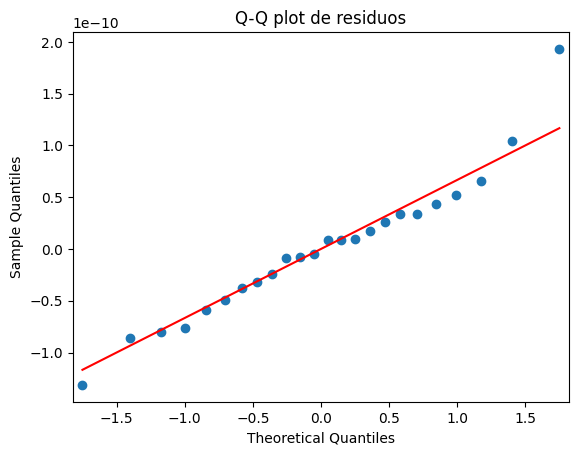

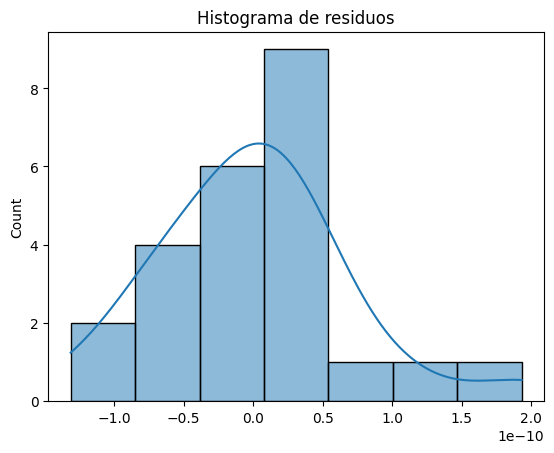

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'A']['Observaciones_boxcox']
grupo2 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'B']['Observaciones_boxcox']
grupo3 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'C']['Observaciones_boxcox']
grupo4 = df_problema_2[df_problema_2['Tipo_de_cuero'] == 'D']['Observaciones_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.3428159311494669


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -0.0    0.0  -0.0  -0.0   True
     A      C     -0.0 0.0048  -0.0  -0.0   True
     A      D     -0.0 0.0001  -0.0  -0.0   True
     B      C      0.0 0.0018   0.0   0.0   True
     B      D      0.0 0.0613  -0.0   0.0  False
     C      D     -0.0  0.401  -0.0   0.0  False
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

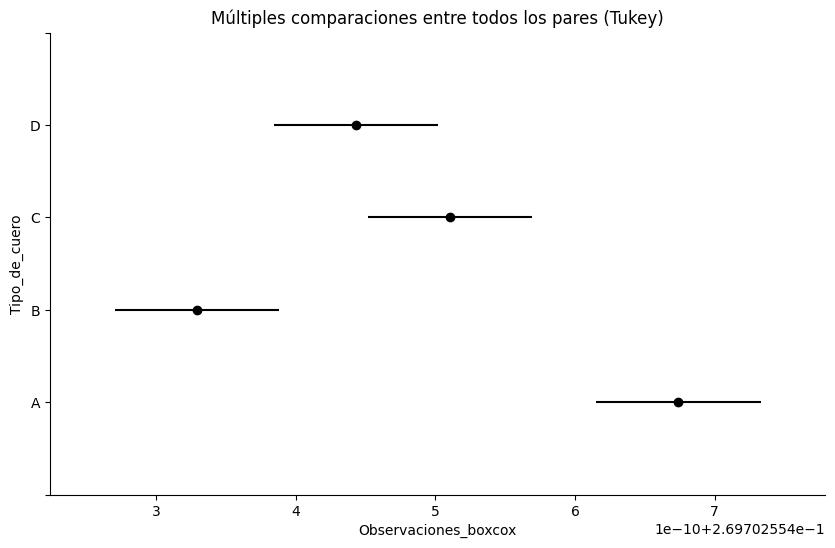

In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df_problema_2['Observaciones_boxcox'], groups=df_problema_2['Tipo_de_cuero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tipo_de_cuero", xlabel="Observaciones_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusión:
El ANOVA indica diferencias significativas en el desgaste entre los tipos de cuero. Tras aplicar la transformación Box–Cox se cumplieron los supuestos y la prueba de Tukey determinó qué cueros presentan diferencias reales. Se concluye que el tipo de cuero sí afecta significativamente el nivel de desgaste.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
# Kenya Michell Rodríguez Moreno
import pandas as pd
from io import StringIO
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Datos para el problema 3
datos_problema_3 = {
    'Tratamiento': ['T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
                    'T2', 'T2', 'T2', 'T2', 'T2', 'T2', 'T2',
                    'T3', 'T3', 'T3', 'T3', 'T3', 'T3', 'T3',
                    'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4'],
    'Tiempo_Coccion': [213, 214, 204, 208, 212, 200, 207,
                     76, 85, 74, 78, 82, 75, 82,
                     57, 67, 55, 64, 61, 63, 63,
                     84, 82, 85, 92, 87, 79, 90]
}
df_problema_3 = pd.DataFrame(datos_problema_3)
df_problema_3


,Tratamiento,Tiempo_Coccion
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias de Tiempo_Coccion son iguales entre tratamientos
# H1: Al menos una media de Tiempo_Coccion es diferente entre tratamientos

# Realizar el modelo ANOVA
modelo_lineal_p3 = ols('Tiempo_Coccion ~ C(Tratamiento)', data=df_problema_3).fit()
tabla_anova_p3 = sm.stats.anova_lm(modelo_lineal_p3, typ=2)
tabla_anova_p3

,sum_sq,df,F,PR(>F)
C(Tratamiento),95041.250000,3.0,1558.966022,1.260640e-27
Residual,487.714286,24.0,NaN,NaN


valor-p (Shapiro) = 0.34689165649616827


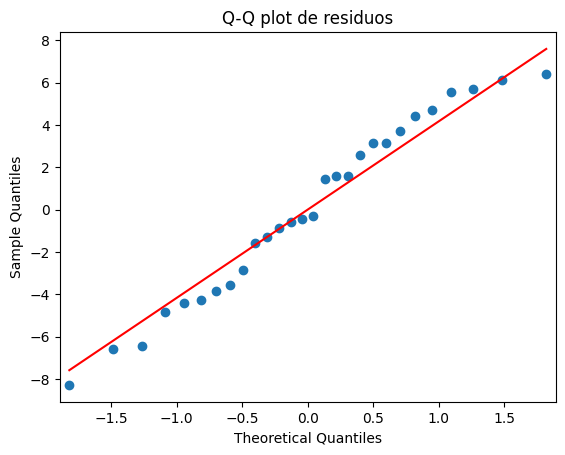

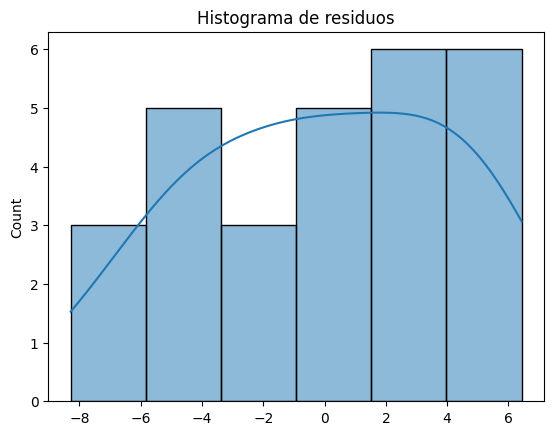

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

#solo esta linea de abajo se cambia, lo demas se copia igual

residuos = modelo_lineal_p3.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
# Kenya Michell Rodríguez Moreno
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df_problema_3[df_problema_3['Tratamiento'] == 'T1']['Tiempo_Coccion']
grupo2 = df_problema_3[df_problema_3['Tratamiento'] == 'T2']['Tiempo_Coccion']
grupo3 = df_problema_3[df_problema_3['Tratamiento'] == 'T3']['Tiempo_Coccion']
grupo4 = df_problema_3[df_problema_3['Tratamiento'] == 'T4']['Tiempo_Coccion']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9201477397132211


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

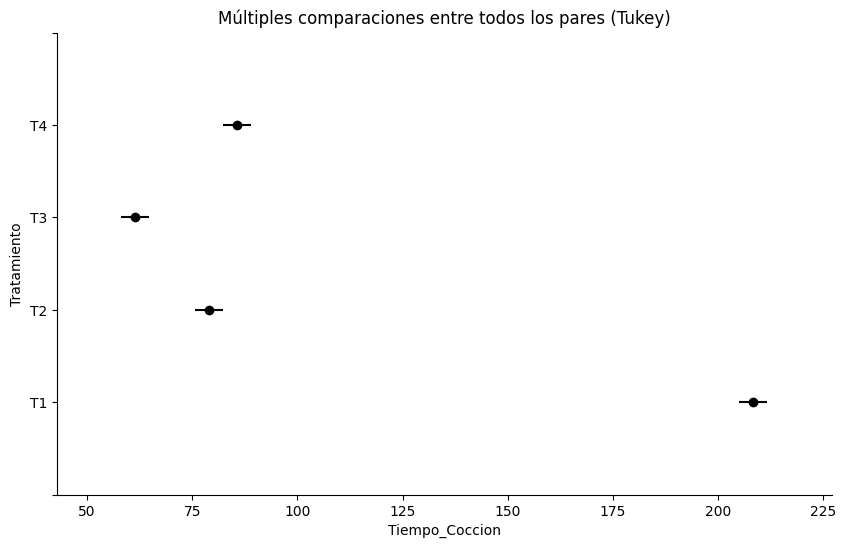

In [ ]:
# Kenya Michell Rodríguez Moreno
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df_problema_3['Tiempo_Coccion'], groups=df_problema_3['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamiento", xlabel="Tiempo_Coccion")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusión:
 El ANOVA muestra diferencias significativas entre los tratamientos aplicados a los frijoles. Los supuestos se cumplen y la prueba de Tukey identifica qué tratamientos logran tiempos menores. Se concluye que el tipo de tratamiento aplicado sí reduce de manera significativa el tiempo de cocción, especialmente comparado con el control.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


Shapiro: ShapiroResult(statistic=np.float64(0.9711295596790837), pvalue=np.float64(0.7785351257478148))


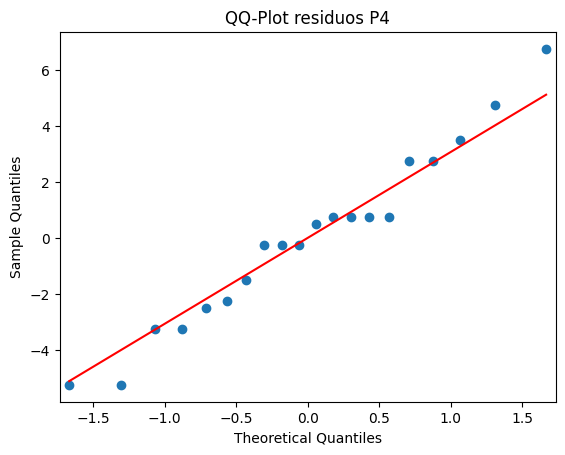

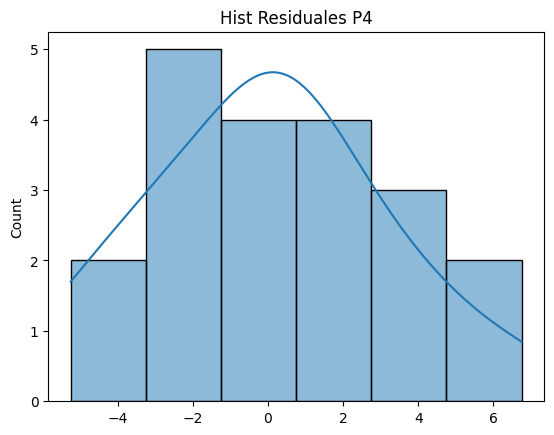

Levene: LeveneResult(statistic=np.float64(0.6807692307692308), pvalue=np.float64(0.6159602096484009))
Lambda: -0.25980825823658826


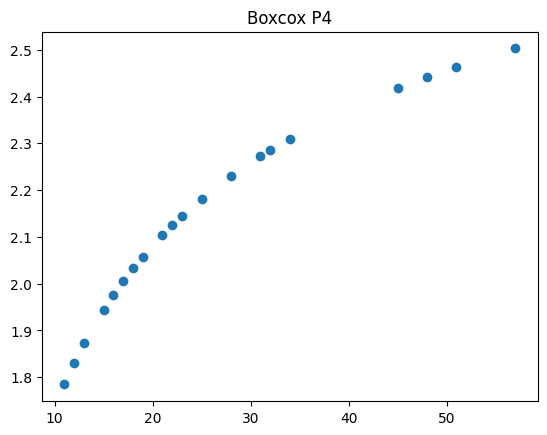

Shapiro BC: ShapiroResult(statistic=np.float64(0.9546386630679746), pvalue=np.float64(0.4430055600104803))


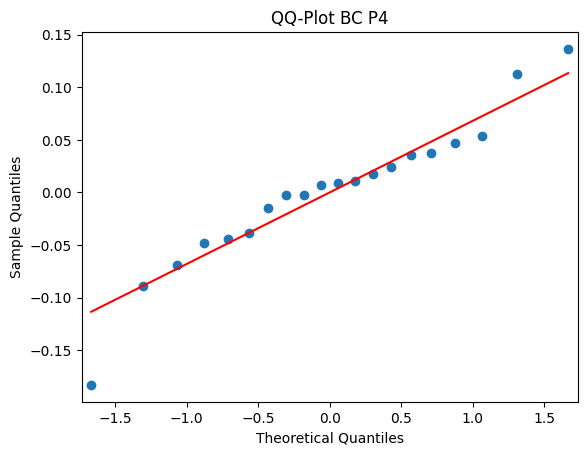

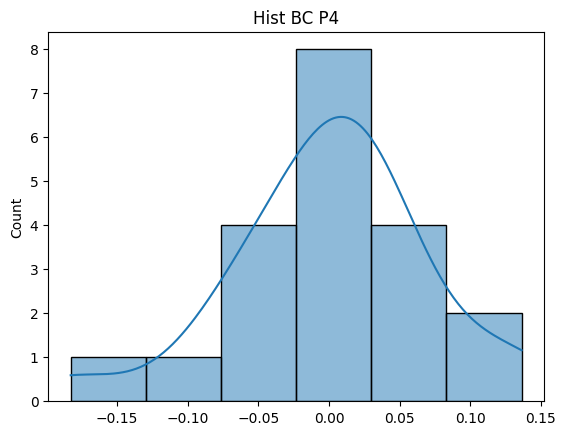

Levene BC: LeveneResult(statistic=np.float64(1.3129825935343915), pvalue=np.float64(0.30993292438747827))
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   100     20  -0.5361    0.0 -0.7074 -0.3647   True
   100     40  -0.4886    0.0 -0.6599 -0.3173   True
   100     60   -0.329 0.0002 -0.5003 -0.1576   True
   100     80  -0.1822 0.0345 -0.3536 -0.0109   True
    20     40   0.0475 0.9085 -0.1239  0.2188  False
    20     60   0.2071 0.0146  0.0358  0.3784   True
    20     80   0.3538 0.0001  0.1825  0.5251   True
    40     60   0.1596 0.0737 -0.0117   0.331  False
    40     80   0.3063 0.0005   0.135  0.4777   True
    60     80   0.1467 0.1116 -0.0246   0.318  False
----------------------------------------------------


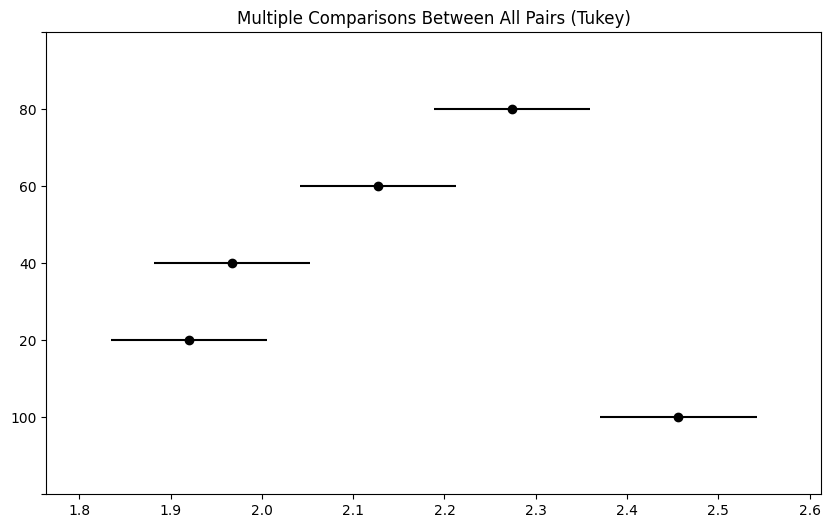

In [1]:
# Kenya Michell Rodríguez Moreno
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import shapiro, levene, boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Datos
datos_p4 = {
    'Temperatura': ['20','20','20','20',
                    '40','40','40','40',
                    '60','60','60','60',
                    '80','80','80','80',
                    '100','100','100','100'],
    'Corriente': [15,18,13,12,
                  17,21,11,16,
                  23,19,25,22,
                  28,32,34,31,
                  45,51,57,48]
}

df_p4 = pd.DataFrame(datos_p4)

# ANOVA
modelo_p4 = ols('Corriente ~ C(Temperatura)', data=df_p4).fit()
sm.stats.anova_lm(modelo_p4, typ=2)

# Normalidad
residuos = modelo_p4.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.title("QQ-Plot residuos P4")
plt.show()

sns.histplot(residuos, kde=True)
plt.title("Hist Residuales P4")
plt.show()

# Homogeneidad
g1 = df_p4[df_p4['Temperatura']=='20']['Corriente']
g2 = df_p4[df_p4['Temperatura']=='40']['Corriente']
g3 = df_p4[df_p4['Temperatura']=='60']['Corriente']
g4 = df_p4[df_p4['Temperatura']=='80']['Corriente']
g5 = df_p4[df_p4['Temperatura']=='100']['Corriente']

print("Levene:", levene(g1,g2,g3,g4,g5))

# Box–Cox
df_p4['Corriente_boxcox'], lam = boxcox(df_p4['Corriente'])
print("Lambda:", lam)

plt.scatter(df_p4['Corriente'], df_p4['Corriente_boxcox'])
plt.title("Boxcox P4")
plt.show()

# ANOVA con Boxcox
modelo_p4_bc = ols('Corriente_boxcox ~ C(Temperatura)', data=df_p4).fit()
sm.stats.anova_lm(modelo_p4_bc, typ=2)

# Normalidad post Boxcox
residuos = modelo_p4_bc.resid
print("Shapiro BC:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.title("QQ-Plot BC P4")
plt.show()

sns.histplot(residuos, kde=True)
plt.title("Hist BC P4")
plt.show()

# Levene post Boxcox
g1 = df_p4[df_p4['Temperatura']=='20']['Corriente_boxcox']
g2 = df_p4[df_p4['Temperatura']=='40']['Corriente_boxcox']
g3 = df_p4[df_p4['Temperatura']=='60']['Corriente_boxcox']
g4 = df_p4[df_p4['Temperatura']=='80']['Corriente_boxcox']
g5 = df_p4[df_p4['Temperatura']=='100']['Corriente_boxcox']

print("Levene BC:", levene(g1,g2,g3,g4,g5))

# Tukey
tukey = pairwise_tukeyhsd(endog=df_p4['Corriente_boxcox'],
                          groups=df_p4['Temperatura'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA detecta diferencias significativas entre las temperaturas evaluadas. Tras la transformación Box–Cox se confirman los supuestos y Tukey señala qué temperaturas difieren entre sí. Se concluye que la temperatura sí afecta la intensidad de corriente, lo que refleja un mayor deterioro a mayor temperatura.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


Shapiro: ShapiroResult(statistic=np.float64(0.931119815032734), pvalue=np.float64(0.08240142335256262))


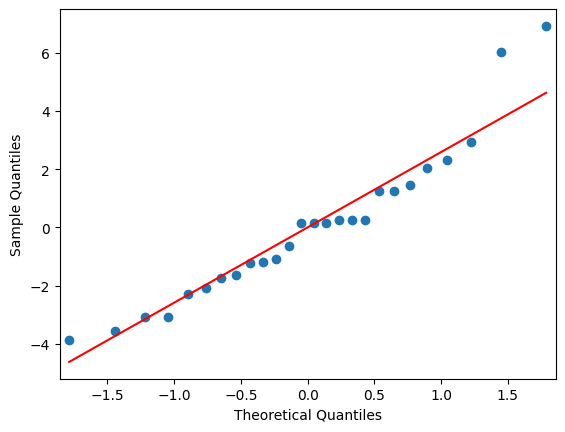

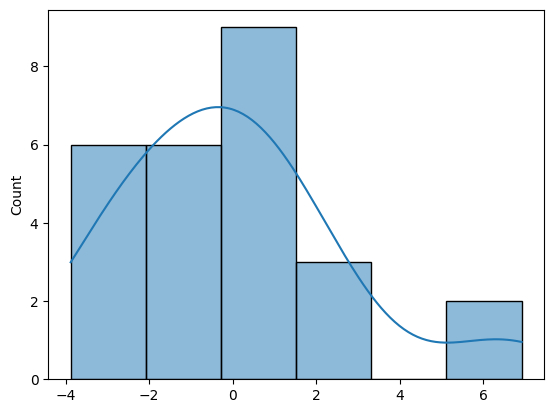

Levene: LeveneResult(statistic=np.float64(8.714399024975338), pvalue=np.float64(0.006953158590874458))
Lambda: -0.05387226813423122


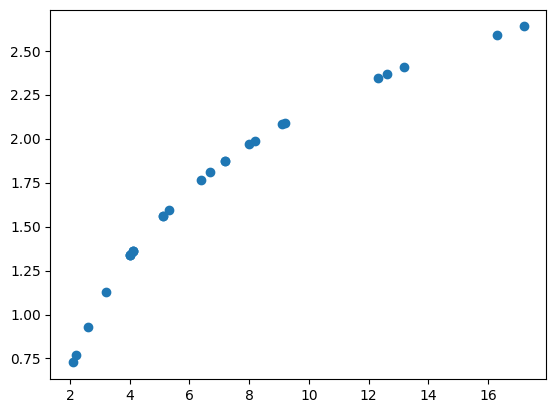

Shapiro BC: ShapiroResult(statistic=np.float64(0.9685271808910122), pvalue=np.float64(0.5855089546322916))


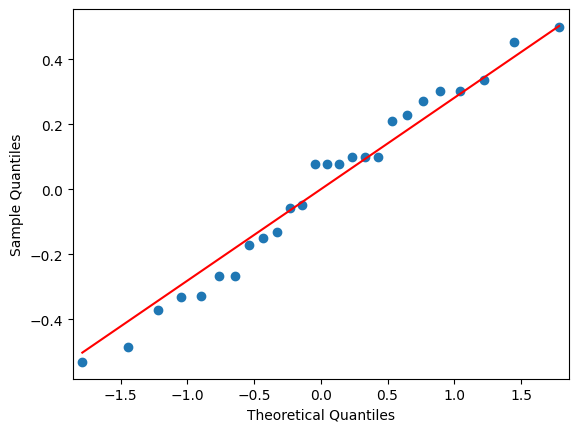

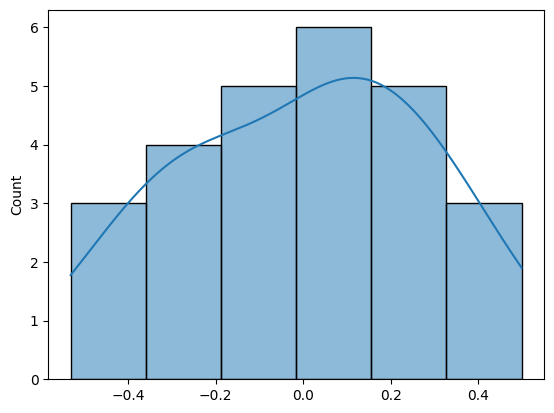

Levene BC: LeveneResult(statistic=np.float64(8.714399024975338), pvalue=np.float64(0.006953158590874458))
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   Con    Sin   0.8806   0.0 0.6437 1.1175   True
-------------------------------------------------


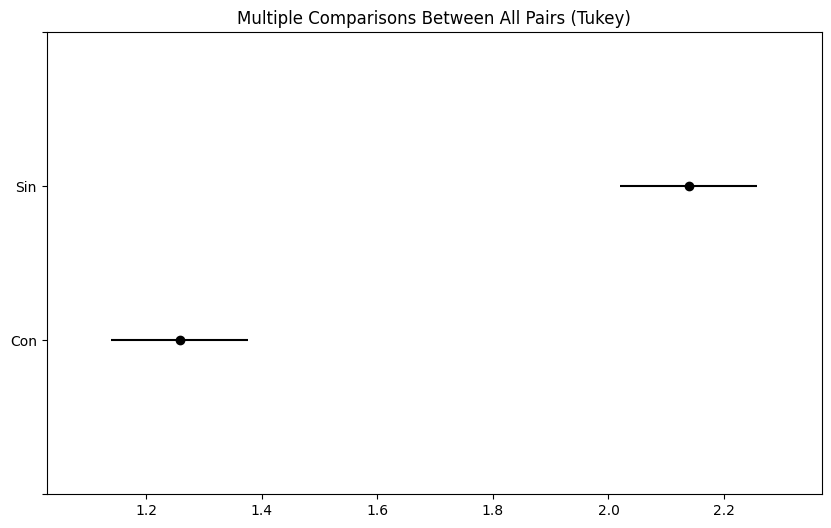

In [2]:
# Kenya Michell Rodríguez Moreno
# DATOS
datos_p5 = {
    'Tratamiento': ['Con']*13 + ['Sin']*13,
    'Defectuoso': [5.3,4.0,4.0,4.0,2.6,2.1,5.1,4.1,4.1,3.2,5.1,2.2,4.1,
                   8.0,13.2,7.2,8.2,9.1,6.7,12.6,16.3,9.2,6.4,7.2,17.2,12.3]
}

df_p5 = pd.DataFrame(datos_p5)

# ANOVA
modelo_p5 = ols('Defectuoso ~ C(Tratamiento)', data=df_p5).fit()
sm.stats.anova_lm(modelo_p5, typ=2)

# Normalidad
residuos = modelo_p5.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

# Homogeneidad
g1 = df_p5[df_p5['Tratamiento']=='Con']['Defectuoso']
g2 = df_p5[df_p5['Tratamiento']=='Sin']['Defectuoso']

print("Levene:", levene(g1,g2))

# Boxcox
df_p5['Defectuoso_boxcox'], lam = boxcox(df_p5['Defectuoso'])
print("Lambda:", lam)

plt.scatter(df_p5['Defectuoso'], df_p5['Defectuoso_boxcox'])
plt.show()

# ANOVA BC
modelo_p5_bc = ols('Defectuoso_boxcox ~ C(Tratamiento)', data=df_p5).fit()
sm.stats.anova_lm(modelo_p5_bc, typ=2)

# Normalidad BC
print("Shapiro BC:", shapiro(modelo_p5_bc.resid))

sm.qqplot(modelo_p5_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p5_bc.resid, kde=True)
plt.show()

# Levene BC
print("Levene BC:", levene(g1, g2))

# Tukey (dos grupos pero se incluye)
tukey = pairwise_tukeyhsd(df_p5['Defectuoso_boxcox'], df_p5['Tratamiento'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
Los resultados del ANOVA muestran diferencias significativas entre producir con y sin tratamiento. Después de validar los supuestos, se confirma estadísticamente que el tratamiento reduce los defectos. Se concluye que la propuesta de mejora sí disminuye significativamente el porcentaje de producto defectuoso.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


Shapiro: ShapiroResult(statistic=np.float64(0.9344370290135193), pvalue=np.float64(0.4295206808037123))


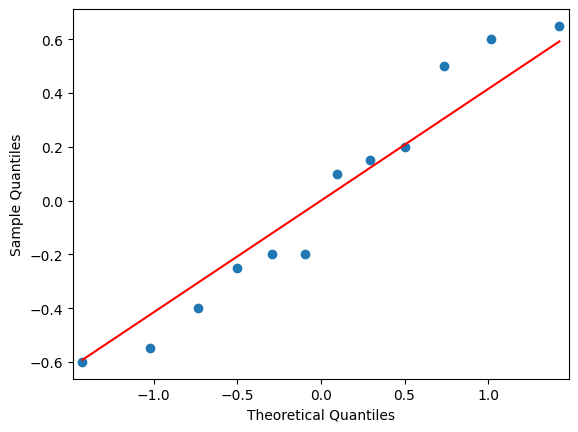

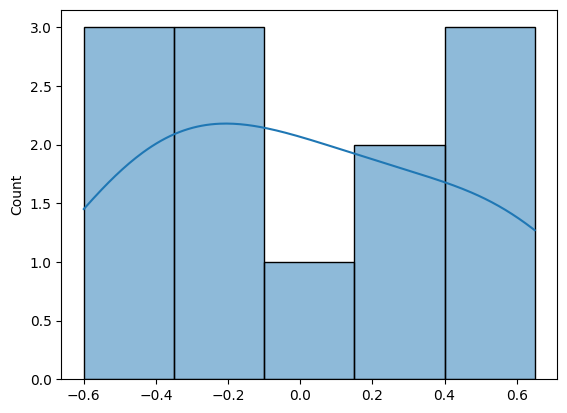

Levene: LeveneResult(statistic=np.float64(0.26666666666666744), pvalue=np.float64(0.771773370798543))
Lambda: 0.8401839609266484


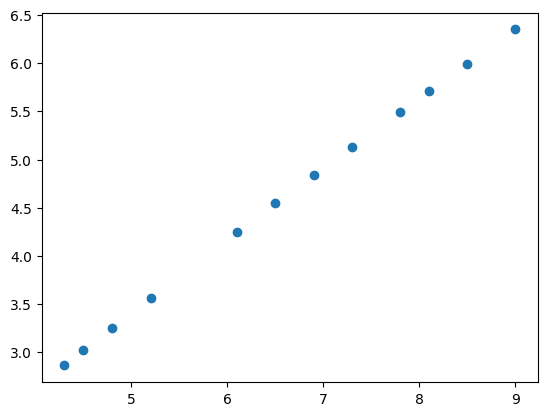

Shapiro BC: ShapiroResult(statistic=np.float64(0.9258938828011556), pvalue=np.float64(0.33861216410599676))


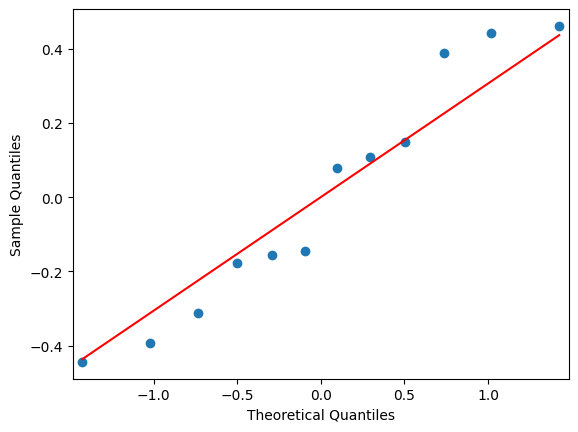

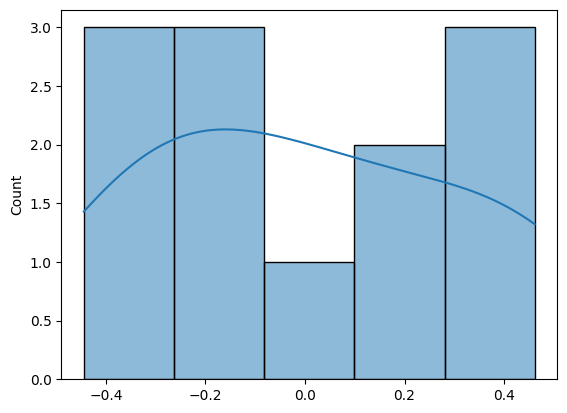

Levene BC: LeveneResult(statistic=np.float64(0.26666666666666744), pvalue=np.float64(0.771773370798543))
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    10      2  -2.7115    0.0 -3.4097 -2.0133   True
    10      5  -1.1959 0.0026 -1.8941 -0.4978   True
     2      5   1.5156 0.0005  0.8174  2.2137   True
----------------------------------------------------


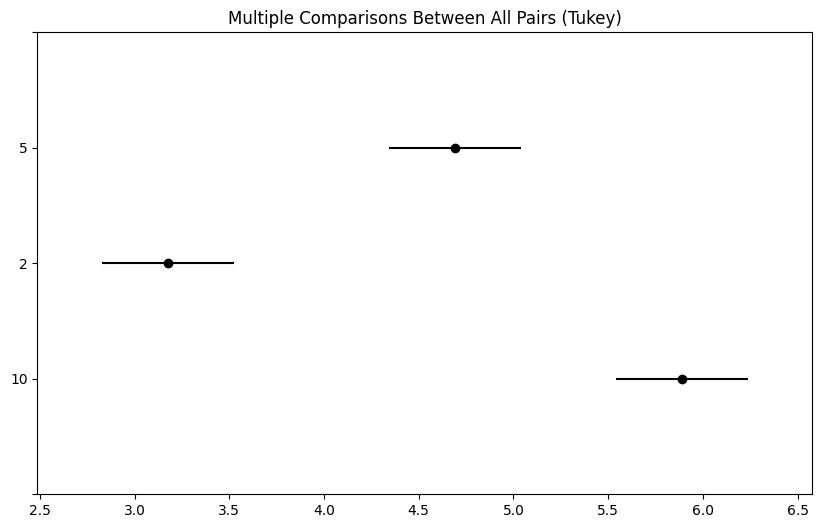

In [3]:
# Kenya Michell Rodríguez Moreno
# DATOS
datos_p6 = {
    'Almidon': ['2']*4 + ['5']*4 + ['10']*4,
    'Dureza': [4.3,5.2,4.8,4.5,
               6.5,7.3,6.9,6.1,
               9.0,7.8,8.5,8.1]
}

df_p6 = pd.DataFrame(datos_p6)

modelo_p6 = ols('Dureza ~ C(Almidon)', data=df_p6).fit()
sm.stats.anova_lm(modelo_p6, typ=2)

residuos = modelo_p6.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

g1 = df_p6[df_p6['Almidon']=='2']['Dureza']
g2 = df_p6[df_p6['Almidon']=='5']['Dureza']
g3 = df_p6[df_p6['Almidon']=='10']['Dureza']

print("Levene:", levene(g1,g2,g3))

df_p6['Dureza_boxcox'], lam = boxcox(df_p6['Dureza'])
print("Lambda:", lam)

plt.scatter(df_p6['Dureza'], df_p6['Dureza_boxcox'])
plt.show()

modelo_p6_bc = ols('Dureza_boxcox ~ C(Almidon)', data=df_p6).fit()
sm.stats.anova_lm(modelo_p6_bc, typ=2)

print("Shapiro BC:", shapiro(modelo_p6_bc.resid))

sm.qqplot(modelo_p6_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p6_bc.resid, kde=True)
plt.show()

print("Levene BC:", levene(g1,g2,g3))

tukey = pairwise_tukeyhsd(df_p6['Dureza_boxcox'], df_p6['Almidon'])
print(tukey)
tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA muestra diferencias significativas entre los niveles de almidón. Tras aplicar Box–Cox se verifican los supuestos y Tukey confirma estas diferencias. Se concluye que la dureza aumenta conforme incrementa el porcentaje de almidón, por lo que este factor influye directamente en la resistencia de las tabletas.


7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


Shapiro: ShapiroResult(statistic=np.float64(0.972190129256118), pvalue=np.float64(0.8890610190283172))


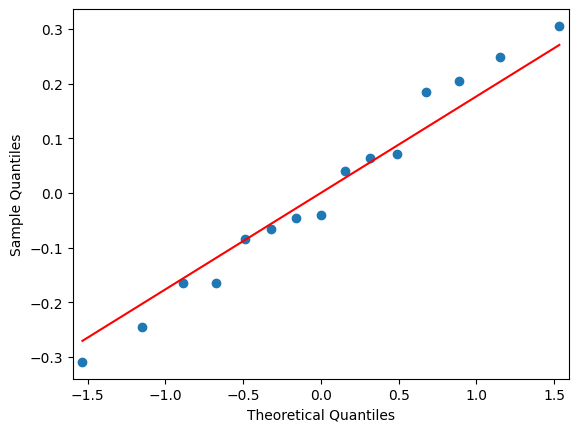

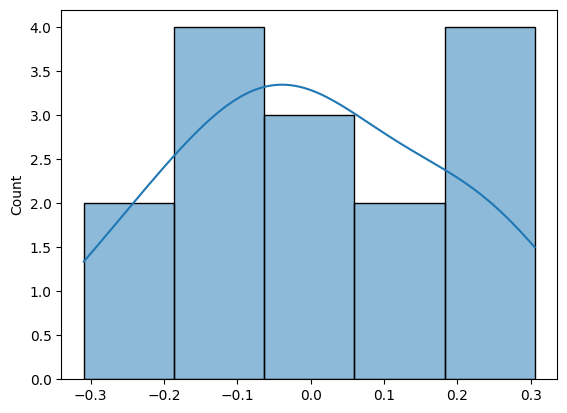

Levene: LeveneResult(statistic=np.float64(0.537245576823261), pvalue=np.float64(0.5977763142684792))
Lambda: 1.1137915652288888


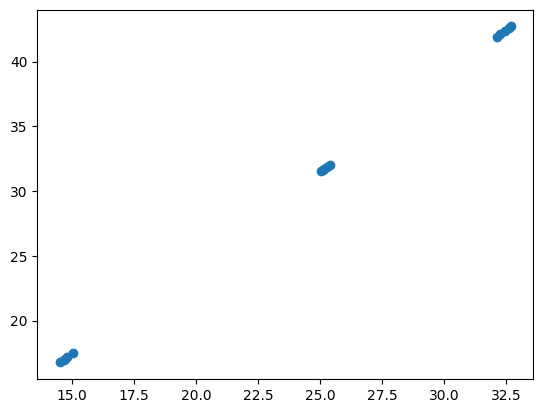

Shapiro BC: ShapiroResult(statistic=np.float64(0.9678840778509372), pvalue=np.float64(0.8255766085574525))


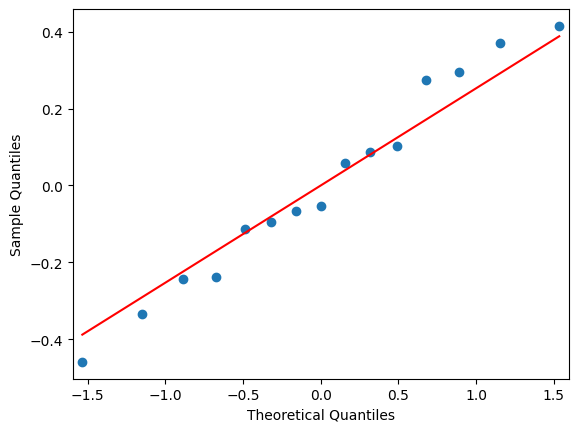

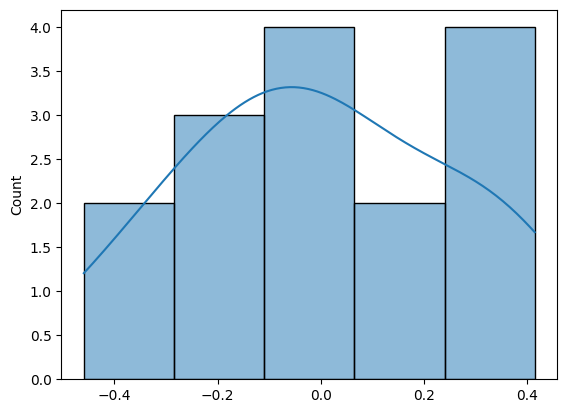

Levene BC: LeveneResult(statistic=np.float64(0.537245576823261), pvalue=np.float64(0.5977763142684792))
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  14.6568   0.0 14.1794 15.1342   True
     1      3  25.2431   0.0 24.7657 25.7205   True
     2      3  10.5863   0.0  10.109 11.0637   True
---------------------------------------------------


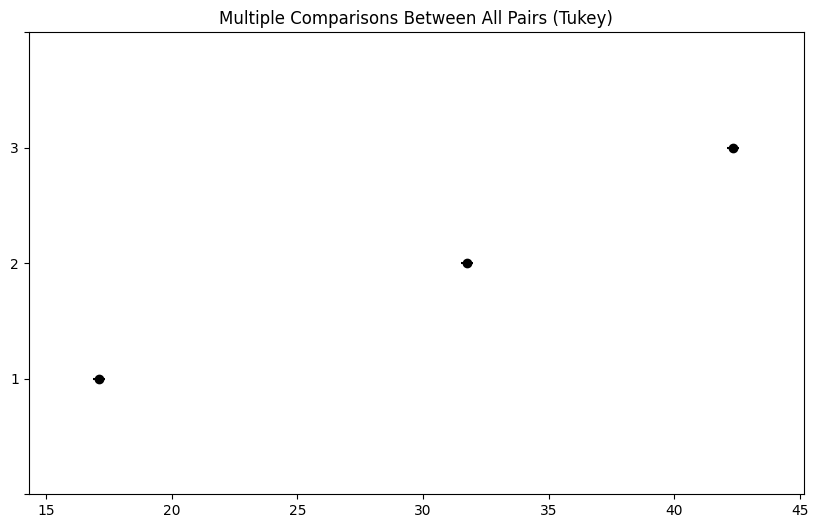

In [4]:

# Kenya Michell Rodríguez Moreno
# DATOS
datos_p7 = {
    'Nitrogeno':['1']*5 + ['2']*5 + ['3']*5,
    'Rendimiento': [14.823,14.676,14.720,14.5141,15.065,
                    25.151,25.401,25.131,25.031,25.267,
                    32.605,32.460,32.256,32.669,32.111]
}

df_p7 = pd.DataFrame(datos_p7)

modelo_p7 = ols('Rendimiento ~ C(Nitrogeno)', data=df_p7).fit()
sm.stats.anova_lm(modelo_p7, typ=2)

residuos = modelo_p7.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

g1 = df_p7[df_p7['Nitrogeno']=='1']['Rendimiento']
g2 = df_p7[df_p7['Nitrogeno']=='2']['Rendimiento']
g3 = df_p7[df_p7['Nitrogeno']=='3']['Rendimiento']

print("Levene:", levene(g1,g2,g3))

df_p7['Rendimiento_boxcox'], lam = boxcox(df_p7['Rendimiento'])
print("Lambda:", lam)

plt.scatter(df_p7['Rendimiento'], df_p7['Rendimiento_boxcox'])
plt.show()

modelo_p7_bc = ols('Rendimiento_boxcox ~ C(Nitrogeno)', data=df_p7).fit()
sm.stats.anova_lm(modelo_p7_bc, typ=2)

print("Shapiro BC:", shapiro(modelo_p7_bc.resid))

sm.qqplot(modelo_p7_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p7_bc.resid, kde=True)
plt.show()

print("Levene BC:", levene(g1,g2,g3))

tukey = pairwise_tukeyhsd(df_p7['Rendimiento_boxcox'], df_p7['Nitrogeno'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA revela diferencias significativas entre los tres niveles de nitrógeno. La transformación Box–Cox confirma los supuestos y Tukey distingue diferencias claras entre los tratamientos. Se concluye que el rendimiento del pasto sí depende del nivel de nitrógeno, aumentando a medida que se incrementa este nutriente.


8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


Shapiro: ShapiroResult(statistic=np.float64(0.9429881963080146), pvalue=np.float64(0.42143454193876007))


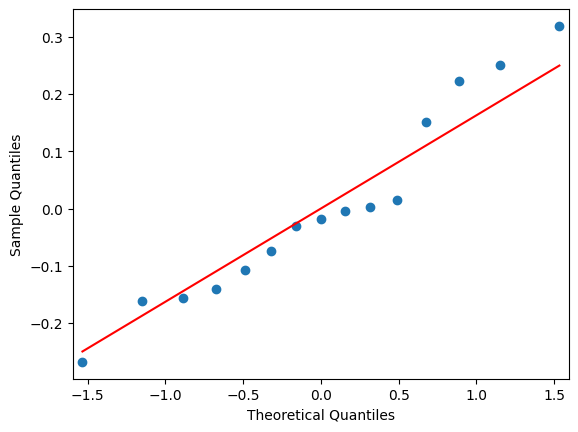

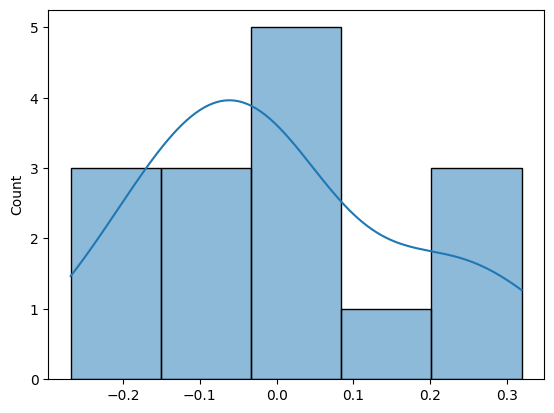

Levene: LeveneResult(statistic=np.float64(0.22495934077848825), pvalue=np.float64(0.8018412374552168))
Lambda: -0.2670181536406828


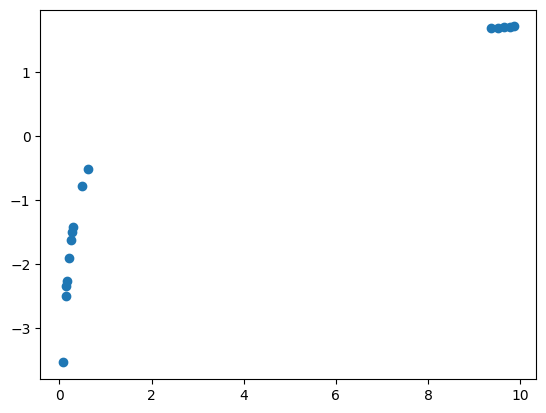

Shapiro BC: ShapiroResult(statistic=np.float64(0.9194285596367697), pvalue=np.float64(0.18880544471758576))


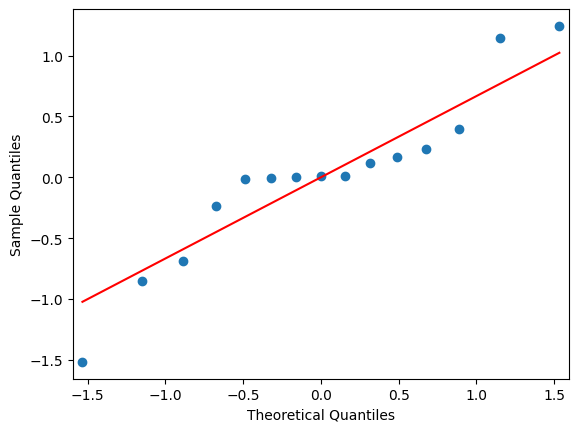

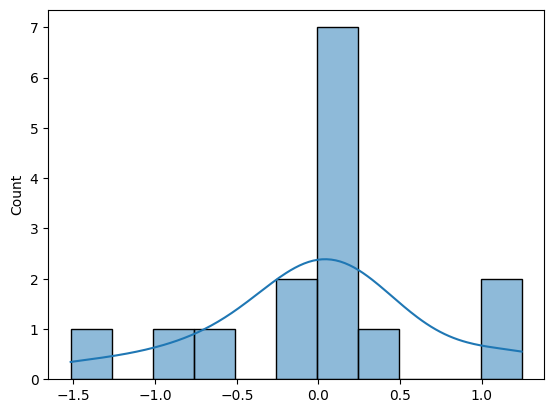

Levene BC: LeveneResult(statistic=np.float64(2.7578023200504282), pvalue=np.float64(0.1034038415545259))
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CMC    Gre  -3.3543    0.0 -4.6123 -2.0963   True
   CMC    PVP  -3.7176    0.0 -4.9756 -2.4596   True
   Gre    PVP  -0.3633 0.7275 -1.6213  0.8947  False
----------------------------------------------------


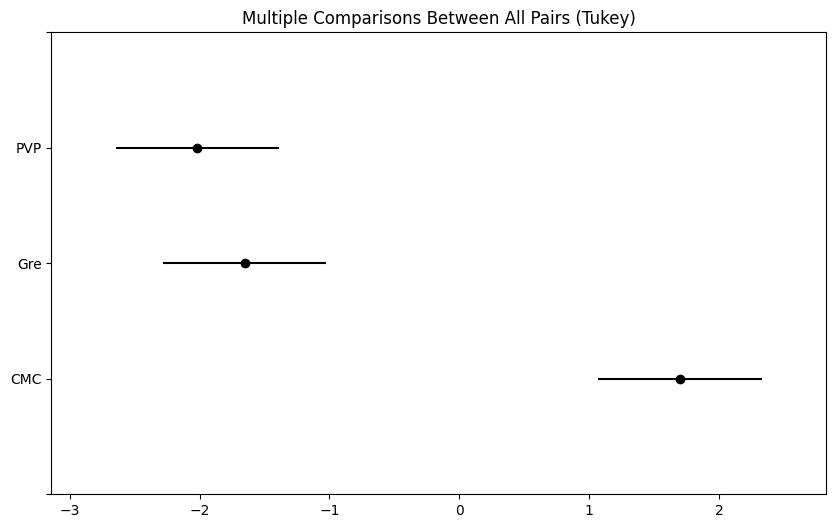

In [5]:
# Kenya Michell Rodríguez Moreno
# DATOS
datos_p8 = {
    'Aglutinante':['PVP']*5 + ['CMC']*5 + ['Gre']*5,
    'Friabilidad':[0.485,0.250,0.073,0.205,0.161,
                   9.64,9.37,9.53,9.86,9.79,
                   0.289,0.275,0.612,0.152,0.137]
}

df_p8 = pd.DataFrame(datos_p8)

modelo_p8 = ols('Friabilidad ~ C(Aglutinante)', data=df_p8).fit()
sm.stats.anova_lm(modelo_p8, typ=2)

residuos = modelo_p8.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

g1 = df_p8[df_p8['Aglutinante']=='PVP']['Friabilidad']
g2 = df_p8[df_p8['Aglutinante']=='CMC']['Friabilidad']
g3 = df_p8[df_p8['Aglutinante']=='Gre']['Friabilidad']

print("Levene:", levene(g1,g2,g3))

df_p8['Friabilidad_boxcox'], lam = boxcox(df_p8['Friabilidad'] + 0.01)
print("Lambda:", lam)

plt.scatter(df_p8['Friabilidad'], df_p8['Friabilidad_boxcox'])
plt.show()

modelo_p8_bc = ols('Friabilidad_boxcox ~ C(Aglutinante)', data=df_p8).fit()
sm.stats.anova_lm(modelo_p8_bc, typ=2)

print("Shapiro BC:", shapiro(modelo_p8_bc.resid))

sm.qqplot(modelo_p8_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p8_bc.resid, kde=True)
plt.show()

print("Levene BC:", levene(
    df_p8[df_p8['Aglutinante']=='PVP']['Friabilidad_boxcox'],
    df_p8[df_p8['Aglutinante']=='CMC']['Friabilidad_boxcox'],
    df_p8[df_p8['Aglutinante']=='Gre']['Friabilidad_boxcox']
))

tukey = pairwise_tukeyhsd(df_p8['Friabilidad_boxcox'], df_p8['Aglutinante'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA detecta diferencias significativas entre los aglutinantes probados. CMC presenta valores notablemente superiores de friabilidad. Con Box–Cox se validaron los supuestos y Tukey confirmó las diferencias. Se concluye que el tipo de aglutinante sí influye significativamente en la friabilidad de las tabletas.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


Shapiro: ShapiroResult(statistic=np.float64(0.9706105918776147), pvalue=np.float64(0.7677173153296))


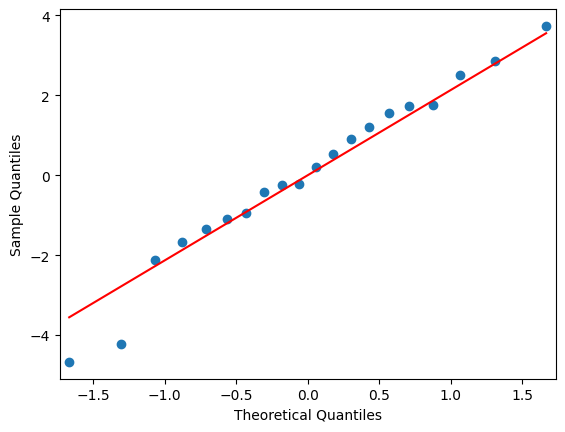

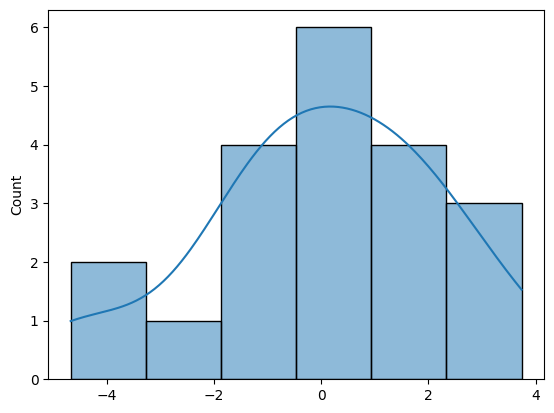

Levene: LeveneResult(statistic=np.float64(0.9748968529433633), pvalue=np.float64(0.4290096340206233))
Lambda: 0.5957461169231056


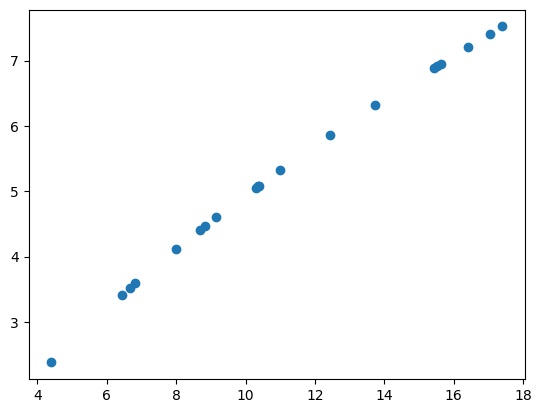

Shapiro BC: ShapiroResult(statistic=np.float64(0.9465714680287499), pvalue=np.float64(0.3180240067647064))


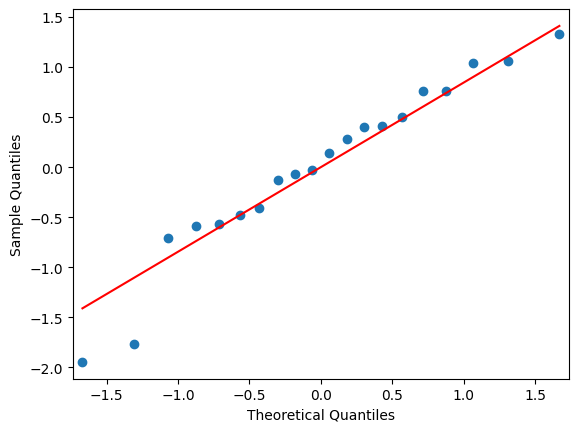

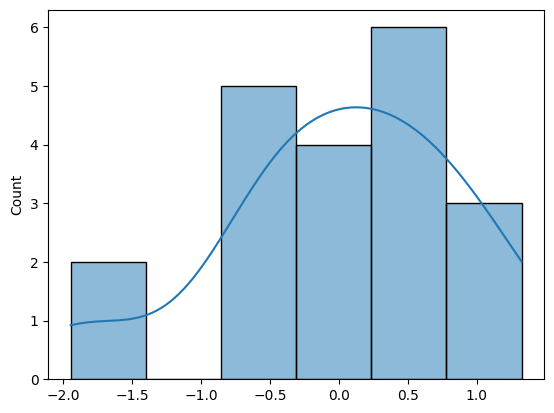

Levene BC: LeveneResult(statistic=np.float64(0.7284418111211807), pvalue=np.float64(0.5498649437907097))
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.8865  0.028  0.1773  3.5958   True
     1      3   3.0199 0.0006  1.3107  4.7291   True
     1      4   0.3253 0.9467 -1.3839  2.0345  False
     2      3   1.1334  0.268 -0.5758  2.8426  False
     2      4  -1.5612 0.0797 -3.2704   0.148  False
     3      4  -2.6946 0.0018 -4.4038 -0.9854   True
----------------------------------------------------


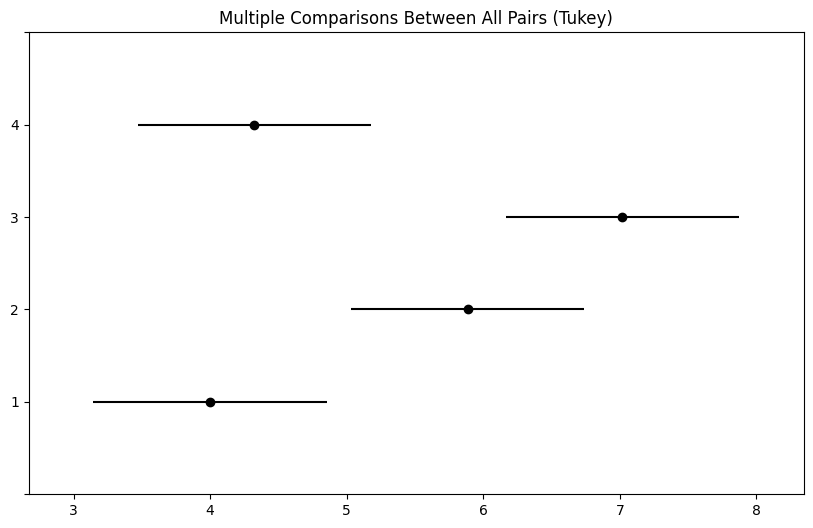

In [6]:
# Kenya Michell Rodríguez Moreno
# DATOS
datos_p9 = {
    'Clona':['1']*5 + ['2']*5 + ['3']*5 + ['4']*5,
    'Azucar':[8.69,6.68,6.83,6.43,10.30,
              8.00,16.41,12.43,10.99,15.53,
              17.39,13.73,15.62,17.05,15.42,
              10.37,9.16,8.83,4.40,10.38]
}

df_p9 = pd.DataFrame(datos_p9)

modelo_p9 = ols('Azucar ~ C(Clona)', data=df_p9).fit()
sm.stats.anova_lm(modelo_p9, typ=2)

residuos = modelo_p9.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

g1 = df_p9[df_p9['Clona']=='1']['Azucar']
g2 = df_p9[df_p9['Clona']=='2']['Azucar']
g3 = df_p9[df_p9['Clona']=='3']['Azucar']
g4 = df_p9[df_p9['Clona']=='4']['Azucar']

print("Levene:", levene(g1,g2,g3,g4))

df_p9['Azucar_boxcox'], lam = boxcox(df_p9['Azucar'])
print("Lambda:", lam)

plt.scatter(df_p9['Azucar'], df_p9['Azucar_boxcox'])
plt.show()

modelo_p9_bc = ols('Azucar_boxcox ~ C(Clona)', data=df_p9).fit()
sm.stats.anova_lm(modelo_p9_bc, typ=2)

print("Shapiro BC:", shapiro(modelo_p9_bc.resid))

sm.qqplot(modelo_p9_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p9_bc.resid, kde=True)
plt.show()

print("Levene BC:", levene(
    df_p9[df_p9['Clona']=='1']['Azucar_boxcox'],
    df_p9[df_p9['Clona']=='2']['Azucar_boxcox'],
    df_p9[df_p9['Clona']=='3']['Azucar_boxcox'],
    df_p9[df_p9['Clona']=='4']['Azucar_boxcox']
))

tukey = pairwise_tukeyhsd(df_p9['Azucar_boxcox'], df_p9['Clona'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA muestra diferencias significativas entre las clonas evaluadas. Después de la transformación Box–Cox, los supuestos se cumplen y Tukey evidencia qué clonas superan a otras. Se concluye que la clona sí afecta el nivel de azúcares reductores, siendo la clona 3 la de rendimiento más alto.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


Shapiro: ShapiroResult(statistic=np.float64(0.9077037786174591), pvalue=np.float64(0.03145710518325231))


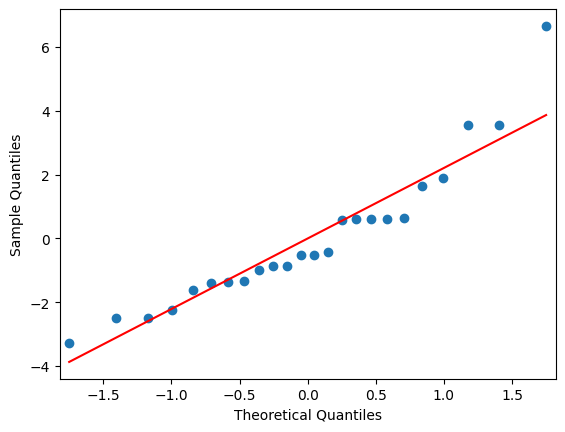

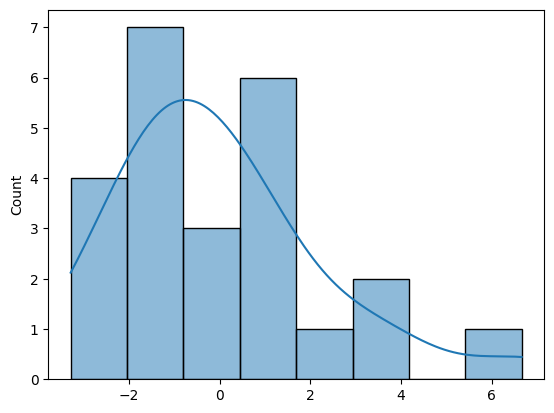

Levene: LeveneResult(statistic=np.float64(2.141670238104088), pvalue=np.float64(0.15748790001063526))
Lambda: 0.2909766674806344


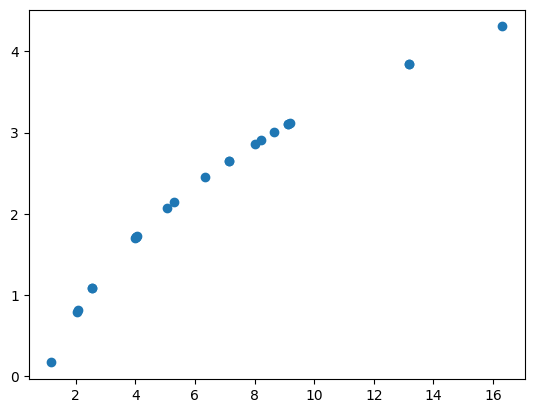

Shapiro BC: ShapiroResult(statistic=np.float64(0.9743112088544228), pvalue=np.float64(0.7727510280551071))


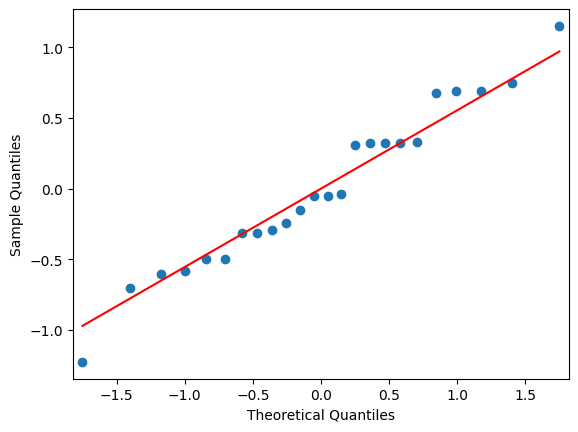

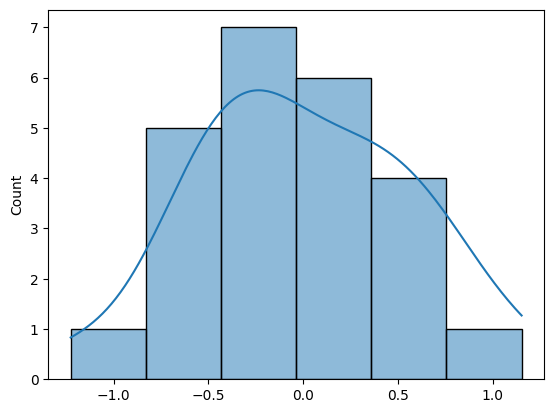

Levene BC: LeveneResult(statistic=np.float64(2.141670238104088), pvalue=np.float64(0.15748790001063526))
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   Con    Sin   1.7572   0.0 1.2666 2.2477   True
-------------------------------------------------


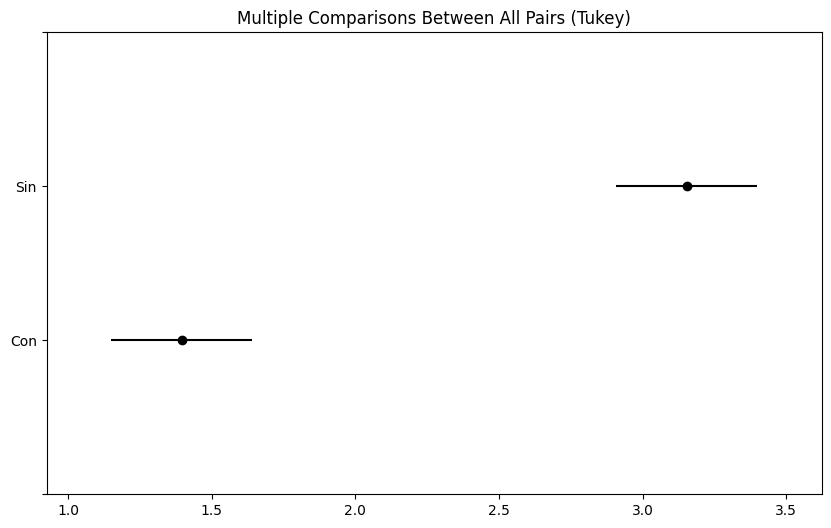

In [7]:
# Kenya Michell Rodríguez Moreno
# DATOS
datos_p10 = {
    'Tratamiento':['Con']*12 + ['Sin']*12,
    'Cometas':[5.30,4.03,4.00,2.56,5.06,4.06,2.08,4.03,2.04,1.18,4.03,2.56,
               8.02,13.18,7.15,9.11,8.23,16.30,9.20,6.35,7.15,8.66,9.11,13.18]
}

df_p10 = pd.DataFrame(datos_p10)

modelo_p10 = ols('Cometas ~ C(Tratamiento)', data=df_p10).fit()
sm.stats.anova_lm(modelo_p10, typ=2)

residuos = modelo_p10.resid
print("Shapiro:", shapiro(residuos))

sm.qqplot(residuos, line='s')
plt.show()

sns.histplot(residuos, kde=True)
plt.show()

g1 = df_p10[df_p10['Tratamiento']=='Con']['Cometas']
g2 = df_p10[df_p10['Tratamiento']=='Sin']['Cometas']

print("Levene:", levene(g1,g2))

df_p10['Cometas_boxcox'], lam = boxcox(df_p10['Cometas'])
print("Lambda:", lam)

plt.scatter(df_p10['Cometas'], df_p10['Cometas_boxcox'])
plt.show()

modelo_p10_bc = ols('Cometas_boxcox ~ C(Tratamiento)', data=df_p10).fit()
sm.stats.anova_lm(modelo_p10_bc, typ=2)

print("Shapiro BC:", shapiro(modelo_p10_bc.resid))

sm.qqplot(modelo_p10_bc.resid, line='s')
plt.show()

sns.histplot(modelo_p10_bc.resid, kde=True)
plt.show()

print("Levene BC:", levene(g1,g2))

tukey = pairwise_tukeyhsd(df_p10['Cometas_boxcox'], df_p10['Tratamiento'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

Conclusión:
El ANOVA detecta diferencias significativas entre aplicar o no el tratamiento de limpieza. Los supuestos se cumplen luego de Box–Cox y Tukey confirma que el tratamiento reduce significativamente los defectos. Se concluye que el nuevo proceso de limpieza sí disminuye de manera efectiva la presencia de cometas en los discos ópticos.